**By: Yasvi Dinesh Vamja**

# Task 1:Linear Regression
## GRIP @ The Sparks Foundation

Task to predict the percentage of marks that a student is expected to score based upon the
number of hours they studied.

This is a simple linear regression task as it involves just two variables.


### Technical Stack : Sikit Learn, Numpy Array, Pandas, Matplotlib,Seaborn

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

### Reading the data

In [3]:
url = "http://bit.ly/w-data"
Student_data = pd.read_csv(url)
print("Data imported successfully")
Student_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Input data Visualization

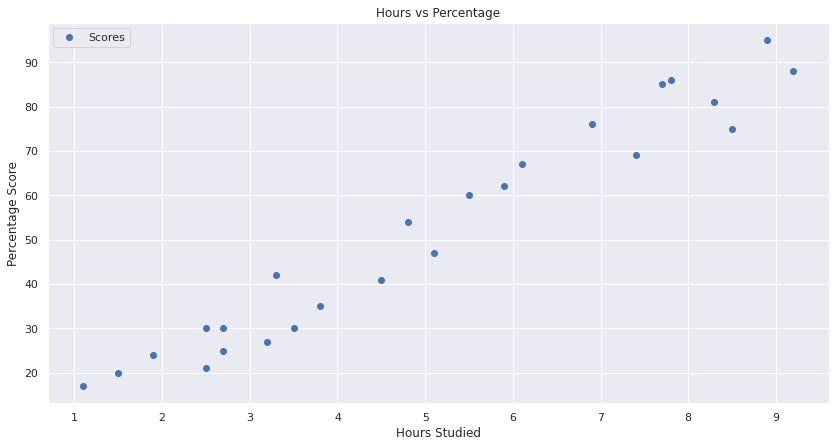

In [4]:
sns.set(style="darkgrid" , rc = {'figure.figsize':(14,7)})
Student_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph we can safely assume a positive linear relation between the number of hours studied and percentage
of score.

### Data Preprocessing

This step involved division of data into "attributes" (inputs) and "labels" (outputs).

In [5]:
X = Student_data.iloc[:, :-1].values  
y = Student_data.iloc[:, 1].values  

###  Model Training

Splitting the data into training and testing sets, and training the algorithm.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Plotting the Line of regression

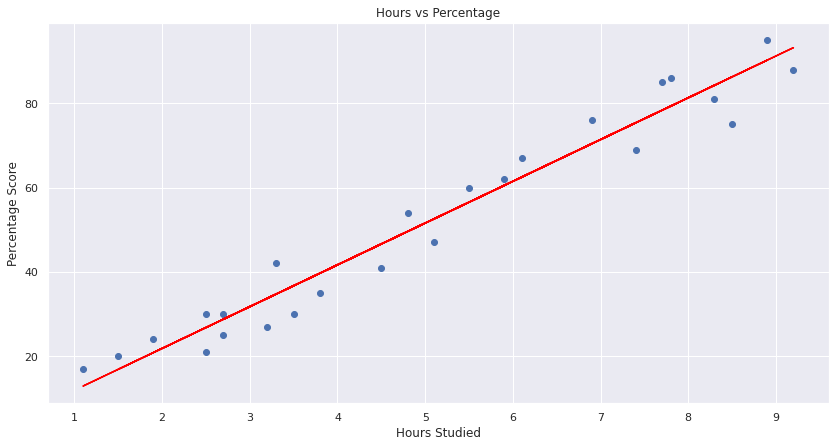

In [7]:
line = regressor.coef_*X+regressor.intercept_     #y=mx+c Line equation

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

### Model Prediction

Now that we have trained our algorithm, it's time to test the model by making some predictions.
For this we will use our test-set data


In [8]:
print(X_test)
# Model Prediction 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing Actual result to the Predicted Model result


In [9]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105354


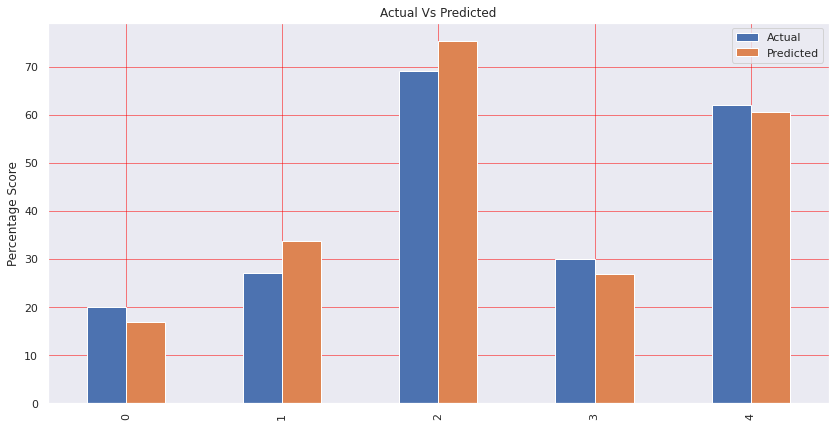

In [12]:
df.plot(kind='bar')
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.title('Actual Vs Predicted')  
plt.ylabel('Percentage Score') 
plt.show()

In [13]:
# Testing the model with our own data
hours = 14.4
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 14.4
Predicted Score = 144.73161336268294


### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well
different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model
performance and predict the accuracy.

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354


### Conclusion
Being able to successfully carry-out Prediction and was
able to evaluate the model's performance.